# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading data

In [2]:
df = pd.read_csv('Diabetes_dataset.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [140]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Filling missing data

The missing data is represented by 0 in the dataset.

In [142]:
means
means.append(df['Glucose'].mean())
means.append(df['BloodPressure'].mean())
means.append(df['SkinThickness'].mean())
means.append(df['Insulin'].mean())
means.append(df['BMI'].mean())
means.append(df['DiabetesPedigreeFunction'].mean())
means.append(df['Age'].mean())

In [144]:
for i,col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    df[col] = df[col].apply(lambda val: means[i] if val==0 else val)

# Visualizing data

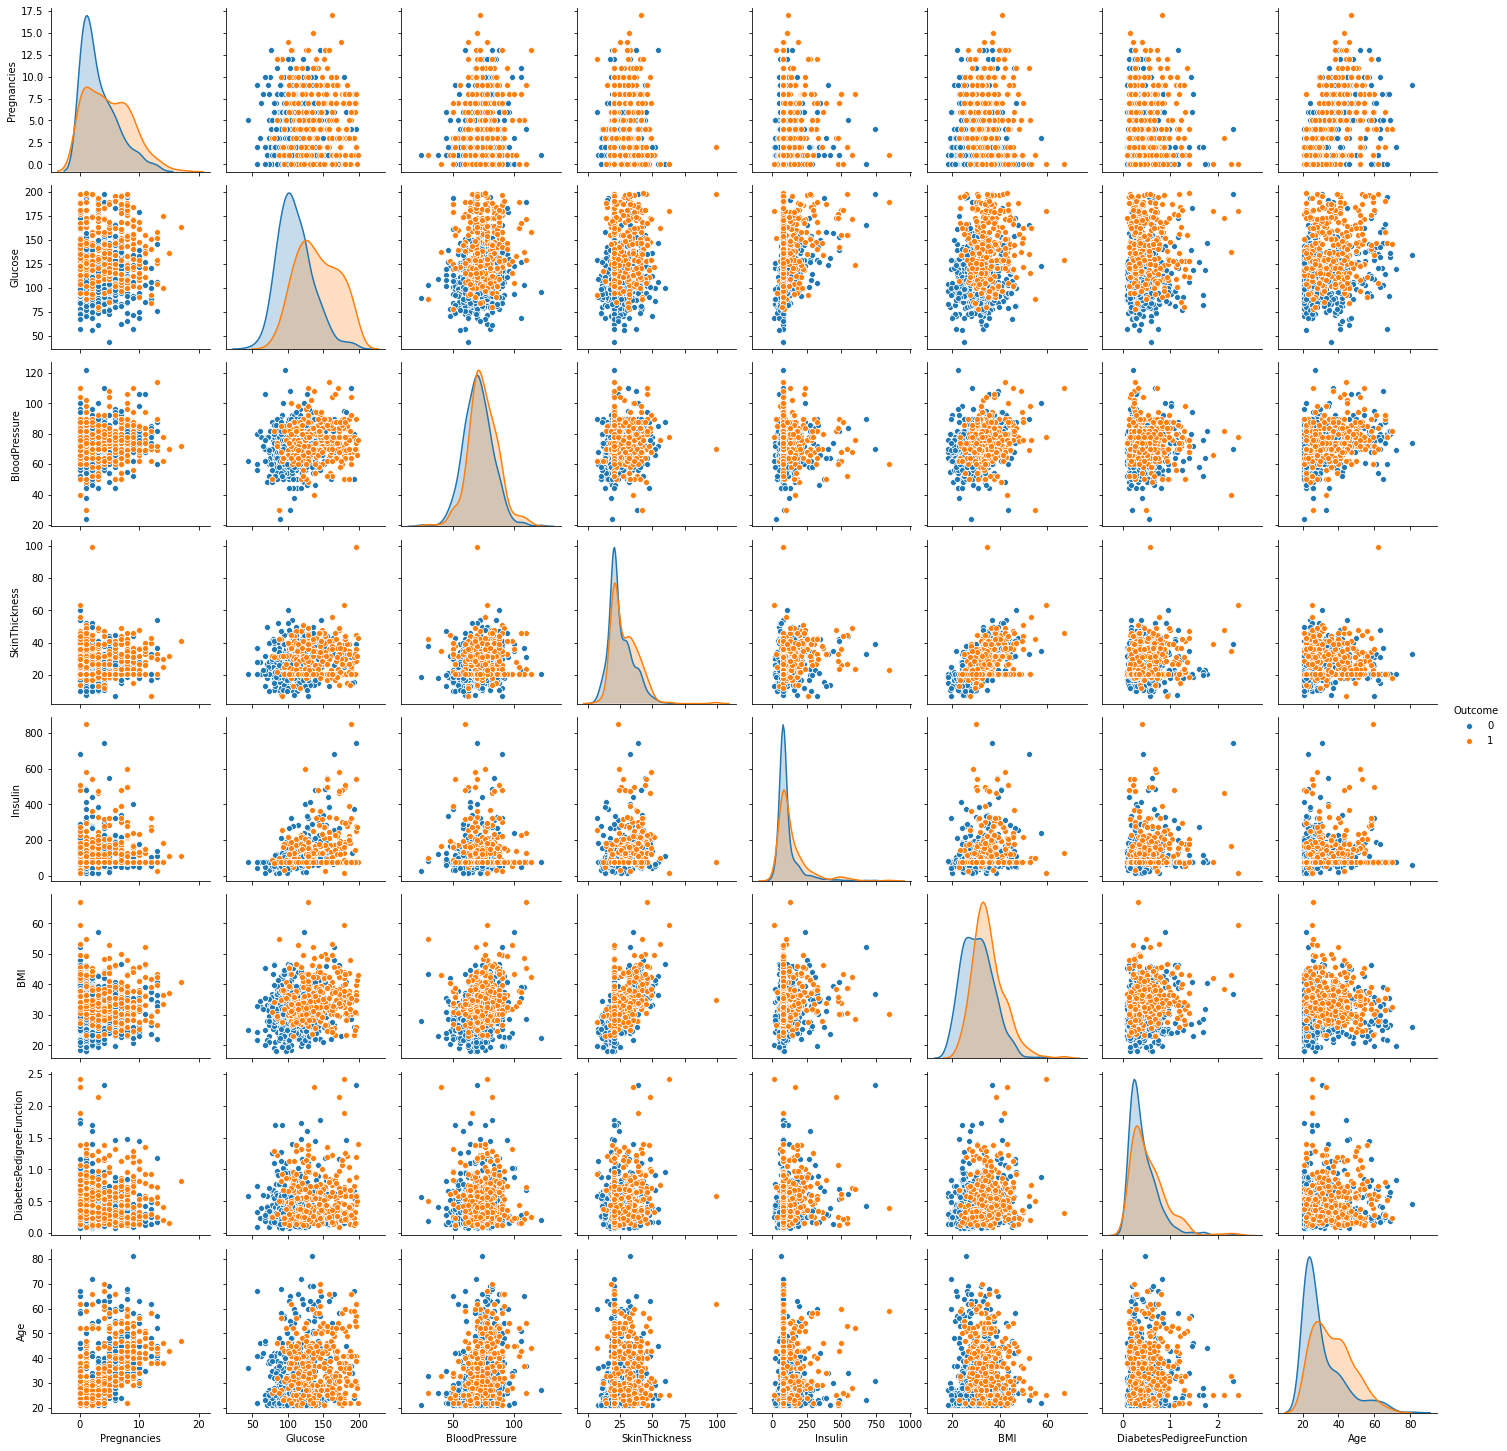

In [146]:
sns.pairplot(df, hue='Outcome')

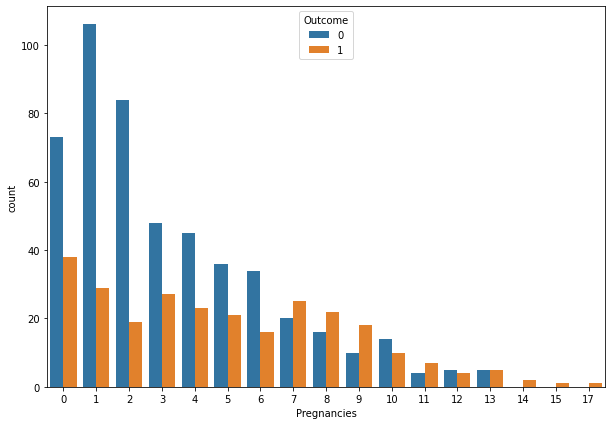

In [158]:
plt.figure(figsize=(10,7))
sns.countplot(x='Pregnancies', hue='Outcome', data=df)

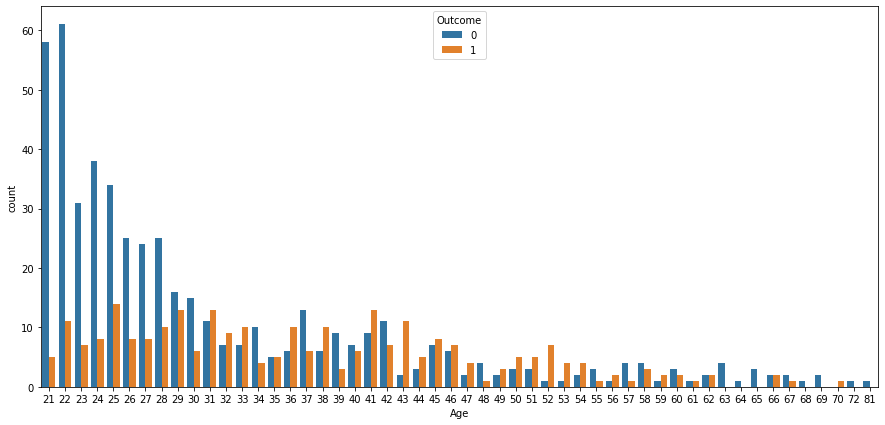

In [174]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age', hue='Outcome', data=df)

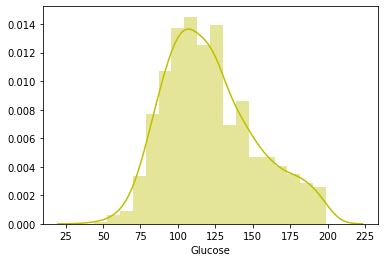

In [168]:
sns.distplot(df['Glucose'],color='y')

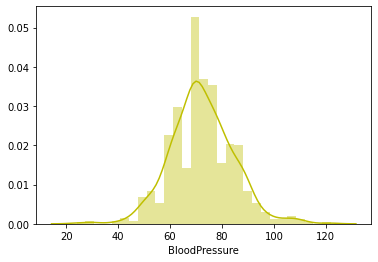

In [169]:
sns.distplot(df['BloodPressure'],color='y')

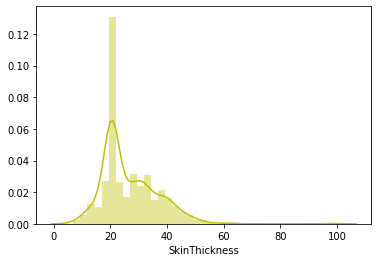

In [170]:
sns.distplot(df['SkinThickness'],color='y')

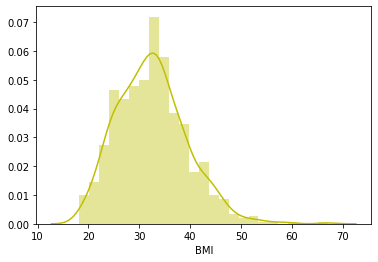

In [171]:
sns.distplot(df['BMI'],color='y')

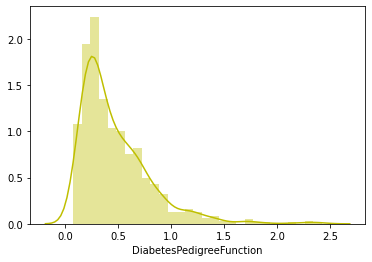

In [172]:
sns.distplot(df['DiabetesPedigreeFunction'],color='y')

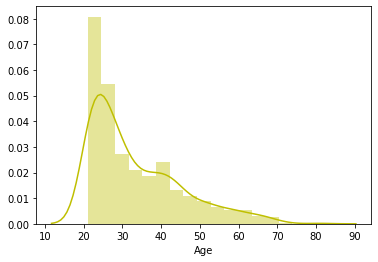

In [173]:
sns.distplot(df['Age'],color='y')

# Training Model

## Importing from sklearn for creating model

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [194]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [195]:
logmodel = LogisticRegression(max_iter=175)

In [196]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=175)

# Testing Model

## Importing from sklearn for testing the model

In [197]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [198]:
train_pred = logmodel.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       332
           1       0.75      0.60      0.66       182

    accuracy                           0.79       514
   macro avg       0.77      0.74      0.75       514
weighted avg       0.78      0.79      0.78       514



In [199]:
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254



In [200]:
confusion_matrix(y_test,predictions)

array([[140,  28],
       [ 36,  50]])

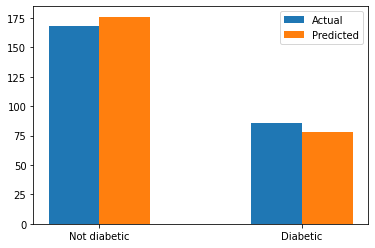

In [201]:
unique, count_test = np.unique(y_test, return_counts=True)
unique, counts_pred = np.unique(predictions, return_counts=True)

fig = plt.figure()
ax = fig.add_subplot()

indices = np.arange(2)
width = 0.25

ax.bar(indices, count_test, width)
ax.bar(indices+width, counts_pred, width)

ax.set_xticks(indices+width/2)
ax.set_xticklabels(['Not diabetic', 'Diabetic'])

ax.legend(['Actual', 'Predicted'])